In [1]:
"一些想法"
#替换其他种类的信号，如Linear chirp signal，Sine-Gaussian signal等等
#是否可以降低采样频率，使其满足奈奎斯特采样定理
#是否还能通过调整频谱函数spectrogram的参数等操作，使得时频图中的能量分布更集中
#这里没有实现lab1的p13‘Play the signal!’

'一些想法'

In [2]:
import numpy as np

def crcbgenqcsig(dataX, snr, qcCoefs):
    """
    Generate a quadratic chirp signal
    
    Parameters:
    -----------
    dataX : array-like
        Vector of time stamps at which the samples of the signal are to be computed
    snr : float
        Matched filtering signal-to-noise ratio
    qcCoefs : array-like
        Vector of three coefficients [a1, a2, a3] that parametrize the phase 
        of the signal: a1*t + a2*t^2 + a3*t^3
    
    Returns:
    --------
    sigVec : numpy.ndarray
        
    """
    # Convert inputs to numpy arrays for element-wise operations
    dataX = np.array(dataX)
    qcCoefs = np.array(qcCoefs)
    
    # Calculate phase vector: a1*t + a2*t^2 + a3*t^3
    phaseVec = qcCoefs[0] * dataX + qcCoefs[1] * dataX**2 + qcCoefs[2] * dataX**3
    
    # Generate the signal using sine function
    sigVec = np.sin(2 * np.pi * phaseVec)
    
    # Normalize and scale by SNR
    sigVec = snr * sigVec / np.linalg.norm(sigVec)
    
    return sigVec

# # Example usage:
# if __name__ == "__main__":
#     # Example parameters
#     t = np.linspace(0, 1, 1000)  # Time vector from 0 to 1 second, 1000 samples
#     snr = 10                     # Signal-to-noise ratio
#     coeffs = [1, 5, 2]          # Quadratic chirp coefficients [a1, a2, a3]
    
#     # Generate the signal
#     signal = crcbgenqcsig(t, snr, coeffs)
    
#     print(f"Generated signal with {len(signal)} samples")
#     print(f"Signal range: [{np.min(signal):.4f}, {np.max(signal):.4f}]")
#     print(f"Signal norm: {np.linalg.norm(signal):.4f}")



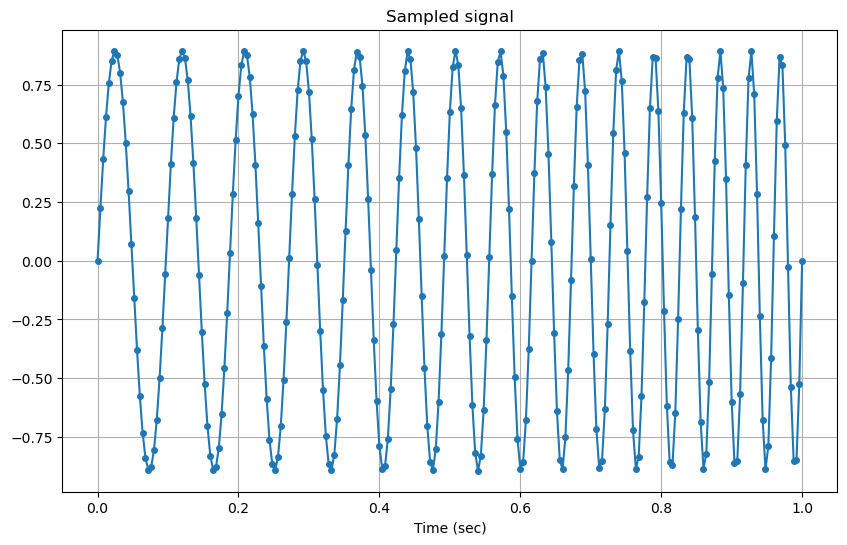

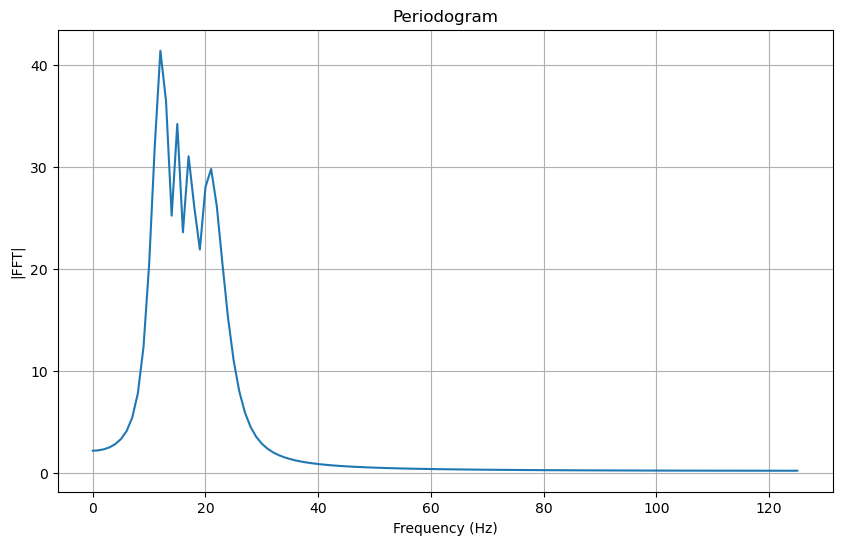

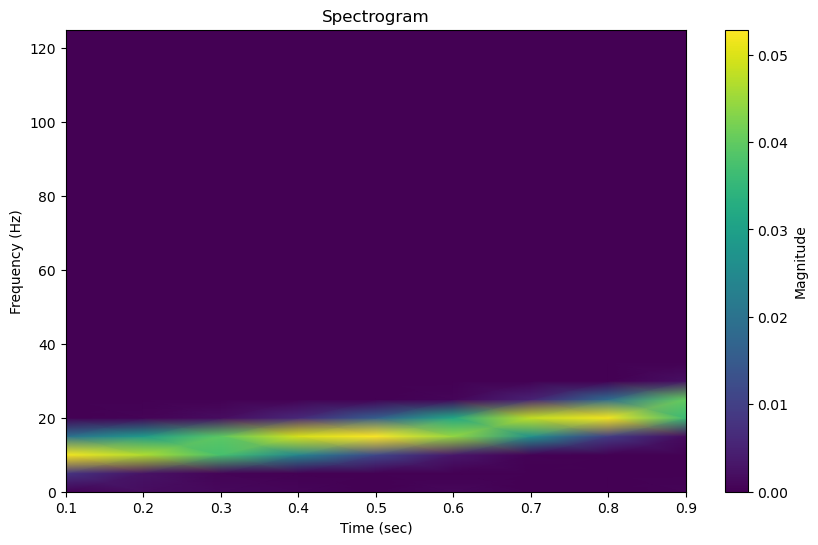

Generated signal with 251 samples
Signal range: [-0.8943, 0.8944]
Signal norm: 10.0000
Sampling frequency: 250.00 Hz
Max instantaneous frequency: 25.00 Hz


In [ ]:
import matplotlib.pyplot as plt
from scipy.signal import spectrogram

# Plot the quadratic chirp signal
# Signal parameters
a1 = 10
a2 = 3
a3 = 3
A = 10

# Instantaneous frequency after 1 sec is
maxFreq = a1 + 2*a2 + 3*a3

# Nyquist frequency guess: 2 * max. instantaneous frequency
nyqFreq = 2 * maxFreq

# Sampling frequency
samplFreq = 5 * nyqFreq
samplIntrvl = 1 / samplFreq

# Time samples
timeVec = np.arange(0, 1.0 + samplIntrvl, samplIntrvl)

# Number of samples
nSamples = len(timeVec)

# Generate the signal
sigVec = crcbgenqcsig(timeVec, A, [a1, a2, a3])


# Plot the signal
plt.figure(figsize=(10, 6))
plt.plot(timeVec, sigVec, marker='.', markersize=8)
plt.xlabel('Time (sec)')
plt.title('Sampled signal')
plt.grid(True)
plt.show()

# Plot the periodogram
# -------------------
# Length of data
dataLen = timeVec[-1] - timeVec[0]

# DFT sample corresponding to Nyquist frequency
kNyq = int(np.floor(nSamples/2)) + 1

# Positive Fourier frequencies
posFreq = np.arange(0, kNyq) * (1/dataLen)

# FFT of signal
fftSig = np.fft.fft(sigVec)

# Discard negative frequencies
fftSig = fftSig[:kNyq]

# Plot periodogram
plt.figure(figsize=(10, 6))
plt.plot(posFreq, np.abs(fftSig))
plt.xlabel('Frequency (Hz)')
plt.ylabel('|FFT|')
plt.title('Periodogram')
plt.grid(True)
plt.show()

# Plot a spectrogram
# ------------------
winLen = 0.2  # sec
ovrlp = 0.1   # sec

# Convert to integer number of samples
winLenSmpls = int(np.floor(winLen * samplFreq))
ovrlpSmpls = int(np.floor(ovrlp * samplFreq))

f, t, Sxx = spectrogram(sigVec, fs=samplFreq, window='hann', 
                        nperseg=winLenSmpls, noverlap=ovrlpSmpls)

plt.figure(figsize=(10, 6))
plt.pcolormesh(t, f, np.abs(Sxx), shading='gouraud')
plt.xlabel('Time (sec)')
plt.ylabel('Frequency (Hz)')
plt.title('Spectrogram')
plt.colorbar(label='Magnitude')
plt.show()

# # Example usage of the function:
# if __name__ == "__main__":
#     print(f"Generated signal with {len(sigVec)} samples")
#     print(f"Signal range: [{np.min(sigVec):.4f}, {np.max(sigVec):.4f}]")
#     print(f"Signal norm: {np.linalg.norm(sigVec):.4f}")
#     print(f"Sampling frequency: {samplFreq:.2f} Hz")
#     print(f"Max instantaneous frequency: {maxFreq:.2f} Hz")